In [1]:
import pandas as pd # 판다스 라이브러리 불러오기

from sklearn.tree import DecisionTreeClassifier # 의사결정 나무 모델 가져오기
from sklearn.linear_model import LogisticRegression # 로지스틱 회귀 모델 가져오기
from sklearn.neighbors import KNeighborsClassifier # 최근접 이웃 모델 가져오기
from sklearn.ensemble import RandomForestClassifier # 랜덤 포레스트 모델 가져오기

from sklearn.ensemble import VotingClassifier # 보팅 분류기 가져오기

from sklearn.model_selection import train_test_split # 데이터를 훈련용과 테스트용으로 나눠주는 함수 불러오기
from sklearn.metrics import accuracy_score # 예측값의 정확도를 계산하기 위한 함수


MRS = 99 # my_random_state 앞글자만 따서 상수 선언

# pandas의 read_csv함수로 ThoraricSurgery.csv 파일을 불러오고 헤더가 없으므로 none, Y0 ~ 부터 시작하는 열 이름 추가
data = pd.read_csv("ThoraricSurgery.csv", header=None, prefix="Y") 

data.head() # data의 제일 처음 5개만 보여주는 함수

,Y0,Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,Y9,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17
0,293,1,3.80,2.80,0,0,0,0,0,0,12,0,0,0,1,0,62,0
1,1,2,2.88,2.16,1,0,0,0,1,1,14,0,0,0,1,0,60,0
2,8,2,3.19,2.50,1,0,0,0,1,0,11,0,0,1,1,0,66,1
3,14,2,3.98,3.06,2,0,0,0,1,1,14,0,0,0,1,0,80,1
4,17,2,2.21,1.88,0,0,1,0,0,0,12,0,0,0,1,0,56,0


In [2]:
x_data = data.drop("Y17", axis=1) # data에서 18번째 열만 제외하고 x_data에 저장

y_data = data.loc[:, "Y17"] # data에서 Y17열만 가져와서 y_data에 저장

"""
위에서 분리한 입력 데이터와 출력 데이터를 각각 훈련용 데이터와 테스트용 데이터로 분할, random_state는 99, 데이터 섞어서 분할 
"""

# 테스트 데이터 사이즈 비율 : 0.1  >> a
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1, random_state=MRS, shuffle=True)

# 테스트 데이터 사이즈 비율 : 0.3  >> b
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_data, y_data, test_size=0.3, random_state=MRS, shuffle=True)

In [9]:
# 의사결정 나무 모델의 최대 깊이는 9로 통일 >> 7 과 11등으로 해봤는데 9가 가장 정확도 높았음

neighbors = 5 # 이웃 개수 설정


# a용

dtc = DecisionTreeClassifier(random_state=MRS, max_depth=9) # 의사결정나무 모델 생성, 깊이 11

Lr = LogisticRegression(random_state=MRS, max_iter=10000) # 로지스틱 회귀 모델 생성
knn = KNeighborsClassifier(n_neighbors=neighbors) # knn 모델 생성
voting = VotingClassifier(estimators=[('LR',Lr),('KNN', knn)], voting='soft') # 보팅 분류기 생성

rf_clf = RandomForestClassifier(random_state=MRS) # 랜덤포레스트 모델 생성

# b용

dtc2 = DecisionTreeClassifier(random_state=MRS, max_depth=9) # 의사결정나무 모델 생성, 깊이 11

Lr2 = LogisticRegression(random_state=MRS, max_iter=10000) # 로지스틱 회귀 모델 생성
knn2 = KNeighborsClassifier(n_neighbors=neighbors) # knn 모델 생성
voting2 = VotingClassifier(estimators=[('LR',Lr2),('KNN', knn2)], voting='soft') # 보팅 분류기 생성

rf_clf2 = RandomForestClassifier(random_state=MRS) # 랜덤 포레스트 모델 생성

In [10]:
# 모델를 훈련 시키기

# a용
dtc.fit(x_train, y_train) # 의사결정 나무 모델 훈련
Lr.fit(x_train, y_train) # 로지스틱 회귀 모델 훈련
knn.fit(x_train, y_train) # 최근접 이웃 모델 훈련
voting.fit(x_train, y_train) # 보팅 모델 훈련
rf_clf.fit(x_train, y_train) # 랜덤 포레스트 모델 훈련

# b용
dtc2.fit(x_train2, y_train2) # 의사결정 나무 모델 훈련
Lr2.fit(x_train2, y_train2) # 로지스틱 회귀 모델 훈련
knn2.fit(x_train2, y_train2) # 최근접 이웃 모델 훈련
voting2.fit(x_train2, y_train2) # 보팅 모델 훈련
rf_clf2.fit(x_train2, y_train2) # 랜덤 포레스트 모델 훈련

RandomForestClassifier(random_state=99)

In [5]:
# 모델들 예측 값을 각각의 pred 변수에 저장

# a용
dtc_pred = dtc.predict(x_test) # 훈련한 의사결정 모델로 예측하기
lr_pred = Lr.predict(x_test) # 훈련한 로지스틱 모델로 예측하기
knn_pred = knn.predict(x_test) # 훈련한 최근접 이웃 모델로 예측하기
vote_pred = voting.predict(x_test) # 훈련한 보팅 모델로 예측하기
rf_clf_pred = rf_clf.predict(x_test) # 훈련한 랜덤 포레스트 모델로 예측하기

# b용
dtc_pred2 = dtc2.predict(x_test2) # 훈련한 의사결정 모델로 예측하기
lr_pred2 = Lr2.predict(x_test2) # 훈련한 로지스틱 모델로 예측하기
knn_pred2 = knn2.predict(x_test2) # 훈련한 최근접 이웃 모델로 예측하기
vote_pred2 = voting2.predict(x_test2) # 훈련한 보팅 모델로 예측하기
rf_clf_pred2 = rf_clf2.predict(x_test2) # 훈련한 랜덤 포레스트 모델로 예측하기

c:\Users\jhkwo\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\jhkwo\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\jhkwo\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\jhkwo\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [6]:
# 각 모델의 예측값과 실제값을 비교하여 정확도 산출
# accuracy_score 함수 사용함

# a용
print("-------------훈련용 데이터 비율 9 / 테스트 데이터 비율 1-------------")
print(f"의사결정 나무 예측 정확도 : {accuracy_score(y_test, dtc_pred):.4f}")
print(f"로지스틱 회귀 예측 정확도 : {accuracy_score(y_test, lr_pred):.4f}")
print(f"최근접 이웃 예측 정확도   : {accuracy_score(y_test, knn_pred):.4f}")
print(f"소프트 보팅 예측 정확도   : {accuracy_score(y_test, vote_pred):.4f}")
print(f"랜덤 포레스트 예측 정확도 : {accuracy_score(y_test, rf_clf_pred):.4f}")

# b용
print("\n-------------훈련용 데이터 비율 7 / 테스트 데이터 비율 3-------------")
print(f"의사결정 나무 예측 정확도 : {accuracy_score(y_test2, dtc_pred2):.4f}")
print(f"로지스틱 회귀 예측 정확도 : {accuracy_score(y_test2, lr_pred2):.4f}")
print(f"최근접 이웃 예측 정확도   : {accuracy_score(y_test2, knn_pred2):.4f}")
print(f"소프트 보팅 예측 정확도   : {accuracy_score(y_test2, vote_pred2):.4f}")
print(f"랜덤 포레스트 예측 정확도 : {accuracy_score(y_test2, rf_clf_pred2):.4f}")

-------------훈련용 데이터 비율 9 / 테스트 데이터 비율 1-------------
의사결정 나무 예측 정확도 : 0.7660
로지스틱 회귀 예측 정확도 : 0.8723
최근접 이웃 예측 정확도   : 0.8936
소프트 보팅 예측 정확도   : 0.8936
랜덤 포레스트 예측 정확도 : 0.8936

-------------훈련용 데이터 비율 7 / 테스트 데이터 비율 3-------------
의사결정 나무 예측 정확도 : 0.8014
로지스틱 회귀 예측 정확도 : 0.8652
최근접 이웃 예측 정확도   : 0.8582
소프트 보팅 예측 정확도   : 0.8723
랜덤 포레스트 예측 정확도 : 0.8723


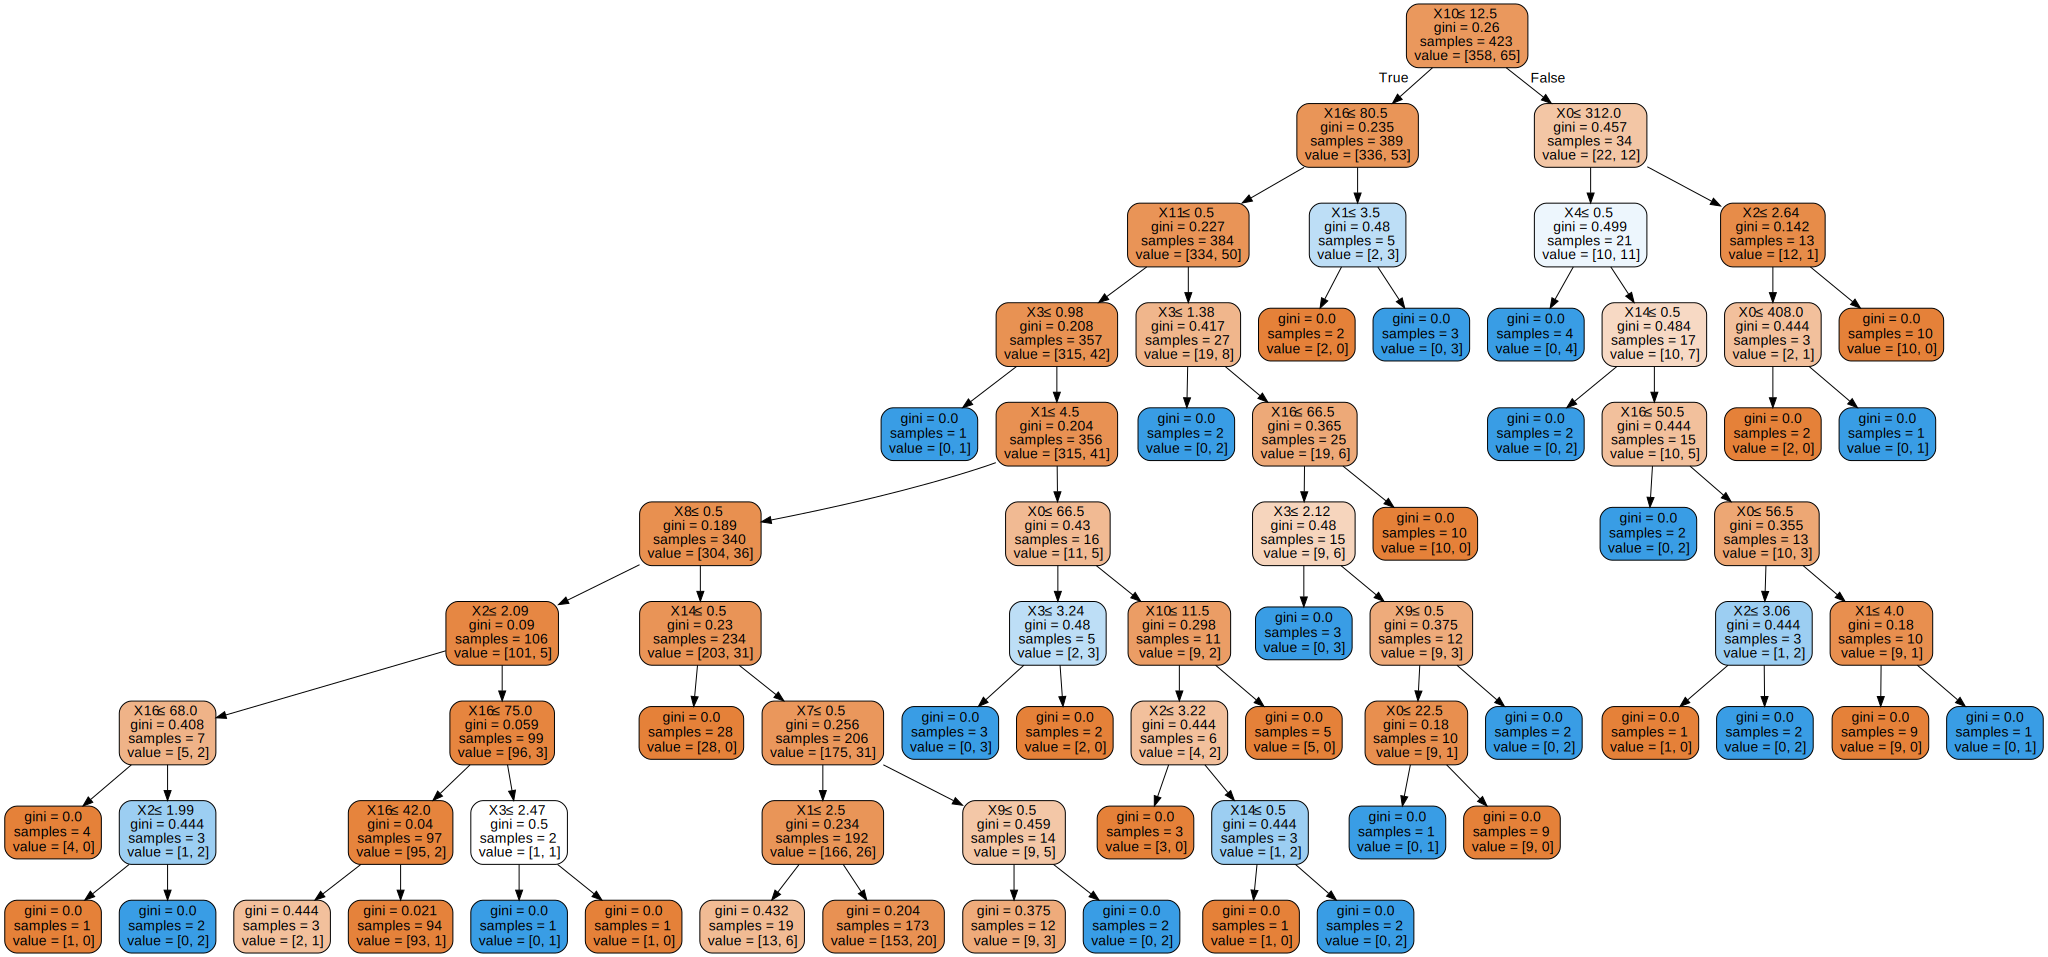

In [7]:
import graphviz
from sklearn import tree

dot = tree.export_graphviz(dtc, out_file=None, filled=True, rounded=True, special_characters=True,)

graph = graphviz.Source(dot)

graph

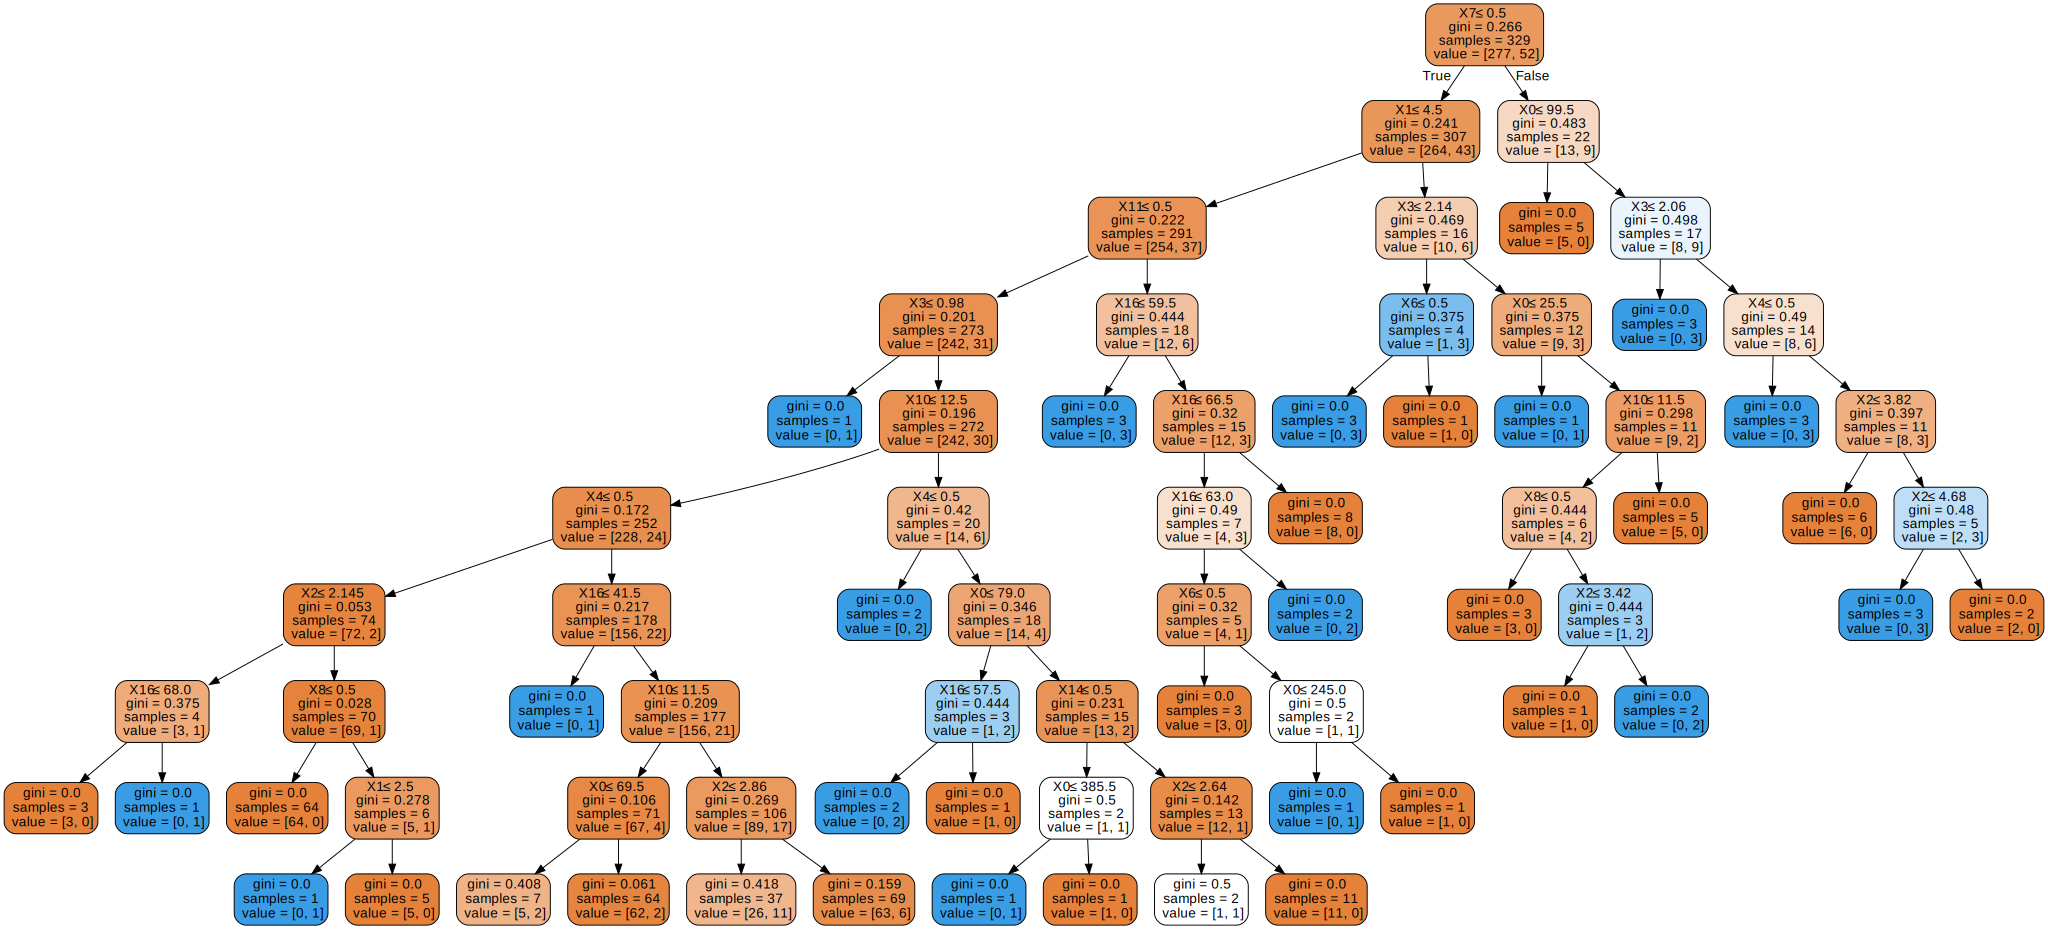

In [8]:
dot2 = tree.export_graphviz(dtc2, out_file=None, filled=True, rounded=True, special_characters=True,)

graph2 = graphviz.Source(dot2)

graph2